برنامه ای بنویسید که یک یا چند تصویر از یک فرد گرفته؛ و سپس وقتی وبکم روشن میشود فقط می دور همه چهره ها مستطیل بکشید؛ اگر چهره آن شخص است مستطیل سبز و در غیر این صورت قرمز

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
detector = cv2.FaceDetectorYN.create(
    "model/face_detection_yunet_2023mar.onnx",
    "",
    (320, 320),
    0.8,
    0.3,
    5000
)

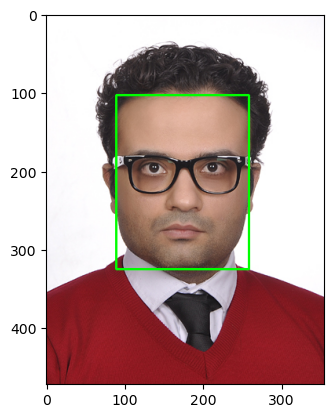

In [5]:
image = cv2.imread("Images/22577.jpg")
height, width, _ = image.shape

# Set input size before inference
detector.setInputSize((width, height))
#
result = detector.detect(image)
if result[1] is not None:
    for idx, face in enumerate(result[1]):
        coords = face[:-1].astype(np.int32)
        cv2.rectangle(image, (coords[0], coords[1]), (coords[0]+coords[2], coords[1]+coords[3]), (0, 255, 0), 2)

plt.imshow(image[...,::-1])

In [7]:
recognizer = cv2.FaceRecognizerSF.create(
"model/face_recognition_sface_2021dec.onnx","")

face1_align = recognizer.alignCrop(image, result[1][0])
face1_feature = recognizer.feature(face1_align)

l2_similarity_threshold = 1.128

In [9]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
detector.setInputSize((width, height))

while True:
    _, frame = cap.read()
    result = detector.detect(frame)
    if result[1] is not None:
        for idx, face in enumerate(result[1]):
            coords = face[:-1].astype(np.int32)
            face2_align = recognizer.alignCrop(frame,face)
            face2_feature = recognizer.feature(face2_align)
            l2_score = recognizer.match(face1_feature, face2_feature, cv2.FaceRecognizerSF_FR_NORM_L2)
            if l2_score <= l2_similarity_threshold:
                cv2.rectangle(frame, (coords[0], coords[1]), (coords[0]+coords[2], coords[1]+coords[3]), (0, 255, 0), 2)
            else:
                cv2.rectangle(frame, (coords[0], coords[1]), (coords[0]+coords[2], coords[1]+coords[3]), (0, 0, 255), 2)
    
    cv2.imshow("camera", frame)
    if cv2.waitKey(10)==ord("q"):
        break
        
cv2.destroyAllWindows()
cap.release()